# Shifted SABR Model for Interest Rates

We examine the Shifted SABR model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.models.sabr_shifted import *

## Shifted SABR Model

I examine the volatility as a function of strike

In [3]:
strikes = np.linspace(0.01, 0.10, 100)

In [4]:
f = 0.032

In [5]:
t_exp = 2.0

In [6]:
alpha = 0.174; beta = 1.0; rho = -0.90; nu = 0.817; shift = 0.10

In [7]:
model = SABRShifted(alpha, beta, rho, nu, shift)

In [8]:
model

OBJECT TYPE: SABRShifted
Alpha: 0.174
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [9]:
volsSABR = model.black_vol(f, strikes, t_exp) * 100

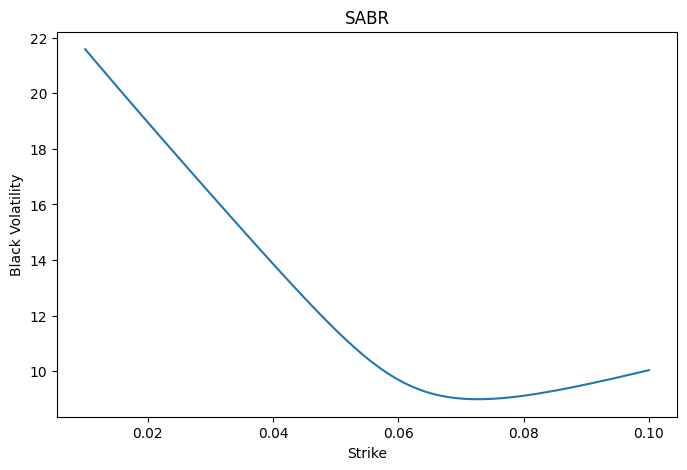

In [10]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility");

## Calibration - Fitting to the ATM Vol

In [11]:
blackVol = 0.22

In [12]:
f = 0.032

In [13]:
k = f

In [14]:
model.set_alpha_from_atm_black_vol(blackVol, k, t_exp)

In [15]:
model

OBJECT TYPE: SABRShifted
Alpha: 0.2486852107791646
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [16]:
model.black_vol(f, k, t_exp) * 100

22.000000000000004

The SABR model now fits the ATM volatility exactly

In [17]:
volsSABR = model.black_vol(f, strikes, t_exp) * 100

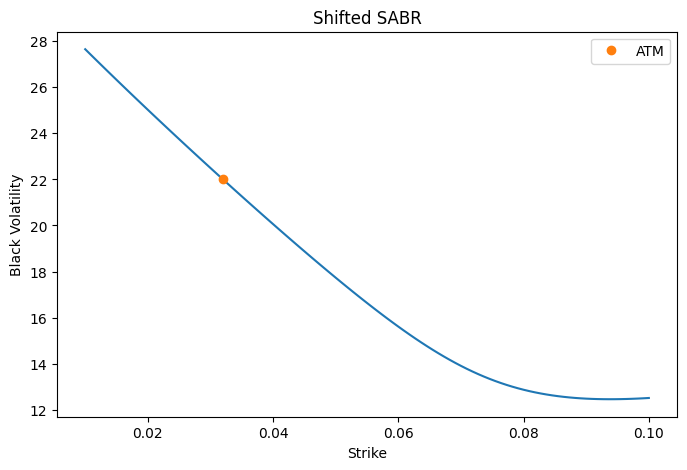

In [18]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("Shifted SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

## Calibration - Fitting to the Any Strike Vol

In [19]:
blackVol = 0.26

In [20]:
f = 0.032

In [21]:
k = 0.040

In [22]:
model.set_alpha_from_black_vol(blackVol, f, k, t_exp)

In [23]:
model

OBJECT TYPE: SABRShifted
Alpha: 0.3254664829562134
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [24]:
volsSABR = model.black_vol(f, strikes, t_exp) * 100

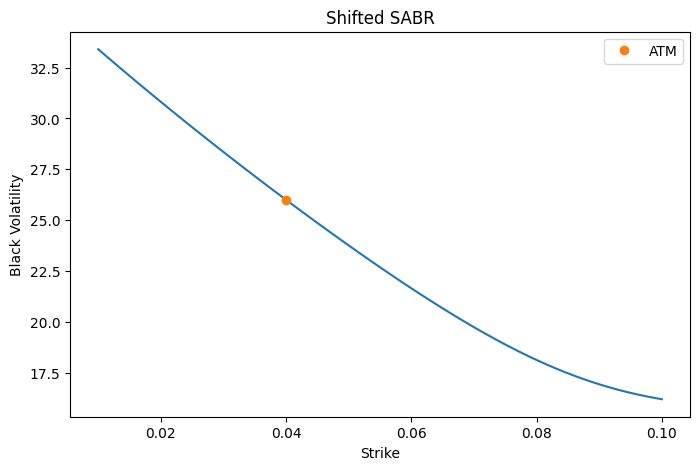

In [25]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("Shifted SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

Copyright (c) 2020 Dominic O'Kane